# Name : Sayan De
## Roll : FT252082

# Credit Score Data Analysis

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

In [172]:
df = pd.read_excel('credit score.xlsx')

# Dataset Overview

In [3]:
#first 5 rows
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.46538,High_spent_Medium_value_payments,361.444004
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434


In [4]:
#Dimensions
df.shape

(50000, 27)

In [5]:
#data type and memory used
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [7]:
#Null check
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [6]:
#Statistical overview()
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633330,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


# Questions

### 1.How many records are there in the dataset?

In [8]:
print('The number of records in the dataset are : ', df.shape[0])

The number of records in the dataset are :  50000


### 2.Give details about the null values in the dataset

In [9]:
#Check how many null values are in the dataset
df.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [22]:
#pecentage break-up
df.isna().sum()/len(df)*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                        10.030
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       14.996
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       6.996
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         2.070
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           8.940
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.542
Payment_Behaviour            0.000
Monthly_Balance              1.124
dtype: float64

The following columns include Null values in it and the percentage value states the the % of the data that is Null

Name : 5015(10.03 %)

Monthly_Inhand_Salary : 7498(14.996 %)

Type_of_Loan : 5704(11.408 %)

Num_of_Delayed_Payment : 3498(6.996 %)

Num_Credit_Inquiries : 1035(2.070 %)

Credit_History_Age : 4470(8.940 %)

Amount_invested_monthly : 2271(4.542 %)

Monthly_Balance : 562(1.124 %)

### 3.For how many unique customers the details are given?

In [27]:
print('The no of unique customers details available in the dataset is : ',df['Customer_ID'].nunique())

The no of unique customers details available in the dataset is :  12500


### 4.Consider only ID, Customer_ID, Annual_Income, Num_of_loan, Num_of_Delayed_Payment, Credit_Mix, Payment_Behaviour and store it in new dataframe named ‘customer_credit_details’

In [152]:
customer_credit_details=df[['ID','Customer_ID','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Credit_Mix','Payment_Behaviour']]

In [153]:
#new dataframe overview
customer_credit_details.head()

,ID,Customer_ID,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Payment_Behaviour
0,0x160a,CUS_0xd40,19114.12,4,7,Good,Low_spent_Small_value_payments
1,0x160b,CUS_0xd40,19114.12,4,9,Good,High_spent_Medium_value_payments
2,0x160c,CUS_0xd40,19114.12,4,4,Good,Low_spent_Medium_value_payments
3,0x160d,CUS_0xd40,19114.12,4,5,Good,High_spent_Medium_value_payments
4,0x1616,CUS_0x21b1,34847.84,1,1,Good,High_spent_Large_value_payments


### 5.Get only the details of customer ‘Josephv’ and store it in new dataframe

In [204]:
df_josephv = df[df['Name']=='Josephv']

In [205]:
df_josephv

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
38984,0x1dee2,CUS_0x1026,September,Josephv,52,500-62-9044,Manager,170614.28,14463.85667,2,...,1947.0,Good,849.69,32.076343,20 Years and 9 Months,No,208.907479,NaN,High_spent_Medium_value_payments,938.695582
38985,0x1dee3,CUS_0x1026,October,Josephv,52,500-62-9044,Manager,170614.28,14463.85667,2,...,3.0,Good,849.69,29.172389,20 Years and 10 Months,No,208.907479,515.424551,High_spent_Medium_value_payments,972.053636
38986,0x1dee4,CUS_0x1026,November,Josephv,52,500-62-9044,Manager,170614.28,NaN,2,...,3.0,Good,849.69,40.405498,20 Years and 11 Months,NM,208.907479,527.569965,High_spent_Medium_value_payments,959.908222
38987,0x1dee5,CUS_0x1026,December,Josephv,52,500-62-9044,Manager,170614.28,14463.85667,2,...,3.0,Good,849.69,39.149764,NaN,No,208.907479,340.601917,High_spent_Medium_value_payments,1146.87627


### 6.Some data in ‘Num_of_Loan’ contains underscore(_) next to the numbers (eg., 7__), which is entered by mistake. Only numbers should be retained in those datapoints. How will you handle this?

In [174]:
#checking the instances from the example given in the question
df[df['Num_of_Loan']=='7_'][['Customer_ID','Num_of_Loan']]

,Customer_ID,Num_of_Loan
256,CUS_0xab76,7_
319,CUS_0x700d,7_
341,CUS_0x1e70,7_
560,CUS_0x6749,7_
563,CUS_0x6749,7_
...,...,...
49281,CUS_0x5b6c,7_
49650,CUS_0x6c58,7_
49706,CUS_0x90a1,7_
49878,CUS_0x4a8f,7_


In [160]:
df['Num_of_Loan']

0         4
1         4
2         4
3         4
4         1
         ..
49995     5
49996    2_
49997     2
49998    2_
49999     2
Name: Num_of_Loan, Length: 50000, dtype: object

So, as we can see there are multiple instances where the No of Loan is taken as a 'Object' type and after the Number there is '_' added by mistake

To solve this first we need to convert the object type to string type and then apply string operation i.e rstrip() to delete the '_' from the right end

Then finally we need to convert the column data type to Integer 

In [162]:
#converting the column data type into string
df['Num_of_Loan'] = df['Num_of_Loan'].astype(str)

In [163]:
# applying string function rstrip(right strip) to delete the underscore from the right end
df['Num_of_Loan'] = df['Num_of_Loan'].str.rstrip('_')
df['Num_of_Loan']

0        4
1        4
2        4
3        4
4        1
        ..
49995    5
49996    2
49997    2
49998    2
49999    2
Name: Num_of_Loan, Length: 50000, dtype: object

In [164]:
#finally converting the data type into Integer format
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [165]:
df['Num_of_Loan'].dtypes

dtype('int32')

In [167]:
#Cleaned data
df[['Customer_ID','Num_of_Loan']]

,Customer_ID,Num_of_Loan
0,CUS_0xd40,4
1,CUS_0xd40,4
2,CUS_0xd40,4
3,CUS_0xd40,4
4,CUS_0x21b1,1
...,...,...
49995,CUS_0x8600,5
49996,CUS_0x942c,2
49997,CUS_0x942c,2
49998,CUS_0x942c,2


So, The Column 'Num_of_Loan' now has only 'Integer' type data and the underscore next to the number is also removed

### 7.	Comment on the distribution of ‘Annual_Income’.

In [171]:
df[df['Annual_Income'].str.contains('_')]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
65,0x16cb,CUS_0x6070,October,Parkm,21,891-55-9364,Accountant,92047.08_,NaN,6,...,4.0,Standard,1296.64,34.659087,29 Years and 11 Months,NM,0.000000,124.480386,High_spent_Large_value_payments,874.678613
67,0x16cd,CUS_0x6070,December,Parkm,21,891-55-9364,Accountant,92047.08_,7591.590000,6,...,4.0,_,1296.64,34.311356,30 Years and 1 Months,Yes,0.000000,384.313225,Low_spent_Medium_value_payments,654.845775
84,0x1706,CUS_0xa16e,September,Lee Chyenz,42,905-50-7912,Media_Manager,10183.015_,1074.584583,7,...,8.0,Bad,1672.43,34.708064,10 Years and 9 Months,Yes,37.588073,52.053379,!@9#%8,297.817006
87,0x1709,CUS_0xa16e,December,Lee Chyenz,42,905-50-7912,Media_Manager,10183.015_,1074.584583,7,...,8.0,Bad,1672.43,33.724301,11 Years and 0 Months,Yes,37.588073,66.983679,Low_spent_Small_value_payments,292.886706
140,0x17ae,CUS_0x9b94,September,Bri,36,734-54-7098,Manager,71681.4_,5799.450000,3,...,0.0,Standard,1293.02,23.808046,26 Years and 3 Months,Yes,53.923514,306.996287,High_spent_Small_value_payments,479.025199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49903,0x25ed1,CUS_0x1232,December,NaN,17,441-26-1297,Developer,14937.49_,1142.790833,8,...,9.0,Bad,3699.44,38.296408,14 Years and 1 Months,NM,50.960878,51.925462,!@9#%8,291.392743
49917,0x25eff,CUS_0x8788,October,Sophie Sassardv,25,138-38-7150,Musician,71025.4_,5766.783333,7,...,10.0,Standard,2542.42,29.172171,14 Years and 10 Months,Yes,195.207484,139.755961,High_spent_Small_value_payments,501.714888
49918,0x25f00,CUS_0x8788,November,Sophie Sassardv,25,138-38-7150,Musician,71025.4_,5766.783333,7,...,10.0,Standard,2542.42,31.808081,14 Years and 11 Months,Yes,195.207484,537.658577,Low_spent_Medium_value_payments,123.812272
49970,0x25f9c,CUS_0xad4f,November,NaN,48,226-45-0652,Developer,22620.79_,1722.065833,6,...,2.0,Standard,642.46,24.632464,30 Years and 1 Months,No,0.000000,123.348548,Low_spent_Small_value_payments,338.858035


As we can see we also need to rectify the the Annual Income column data

In [177]:
df['Annual_Income']=df['Annual_Income'].astype(str)
df['Annual_Income'] = df['Annual_Income'].str.rstrip('_')
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [179]:
df['Annual_Income'].dtypes

dtype('float64')

In [178]:
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.46538,High_spent_Medium_value_payments,361.444004
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446


In [191]:
#statistical overview
df['Annual_Income'].describe()

count    5.000000e+04
mean     1.663342e+05
std      1.351965e+06
min      7.005930e+03
25%      1.945333e+04
50%      3.757782e+04
75%      7.281702e+04
max      2.413726e+07
Name: Annual_Income, dtype: float64

Data distribution of the Annual Income

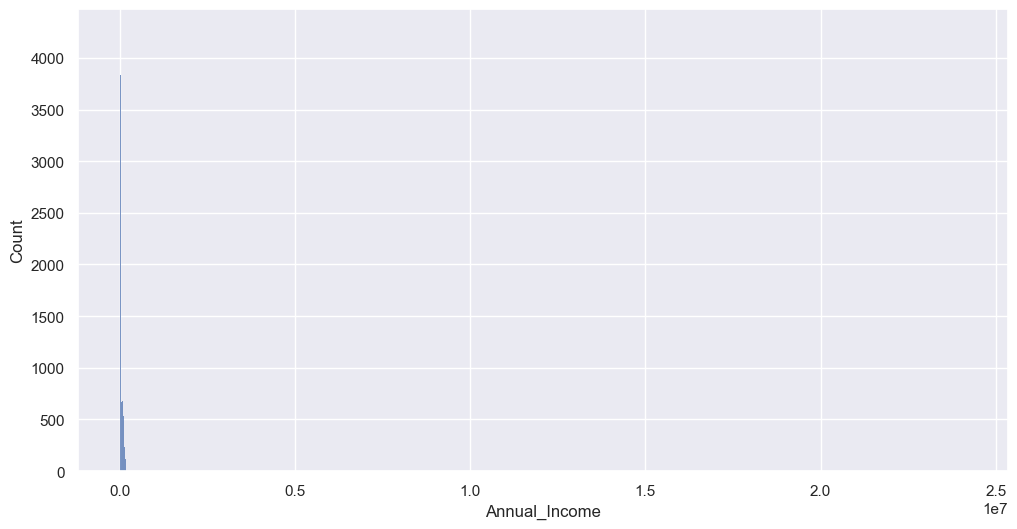

In [186]:
plt.figure(figsize=(12,6))
sns.histplot(data = df , x = 'Annual_Income')
plt.show()

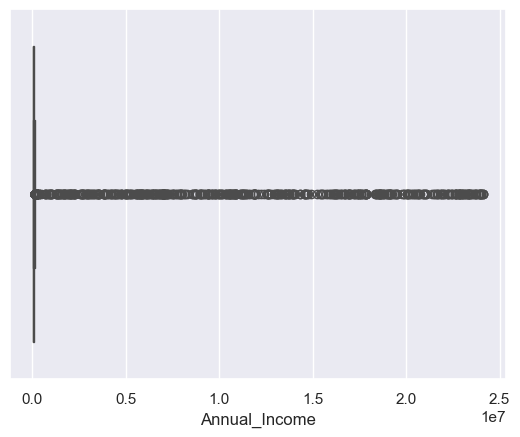

In [195]:
sns.boxplot(x = 'Annual_Income', data = df)
plt.show()

### Skewness: 
The distribution is highly skewed to the right. The majority of the data points are concentrated at the lower end of the 'Annual_Income' axis, indicating that most values are very low.

### Outliers:
There are some significant outliers with higher 'Annual_Income' values.

The vast majority of the data points are clustered near zero. This high concentration suggests that many individuals have a low annual income compared to the few who have higher incomes.

### 8.In the customer_credit_details dataframe created, get the count plot for the credit_mix and payment_behaviour. Comment on the plot output.

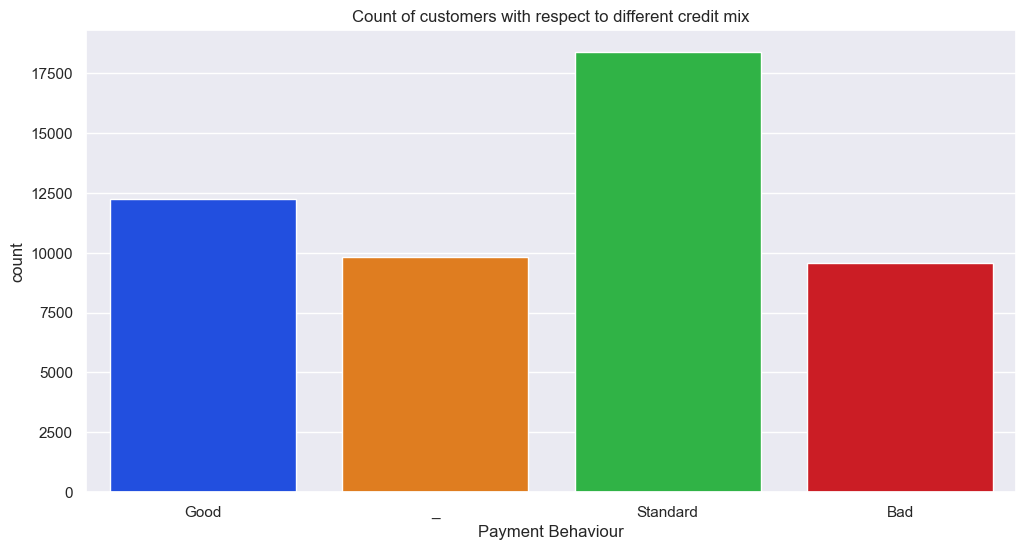

In [196]:
sns.set()
plt.figure(figsize=(12,6))
sns.countplot(data = customer_credit_details , x = 'Credit_Mix', palette = 'bright' )
plt.xlabel('Payment Behaviour')
plt.title('Count of customers with respect to different credit mix')
plt.show()
plt.show()

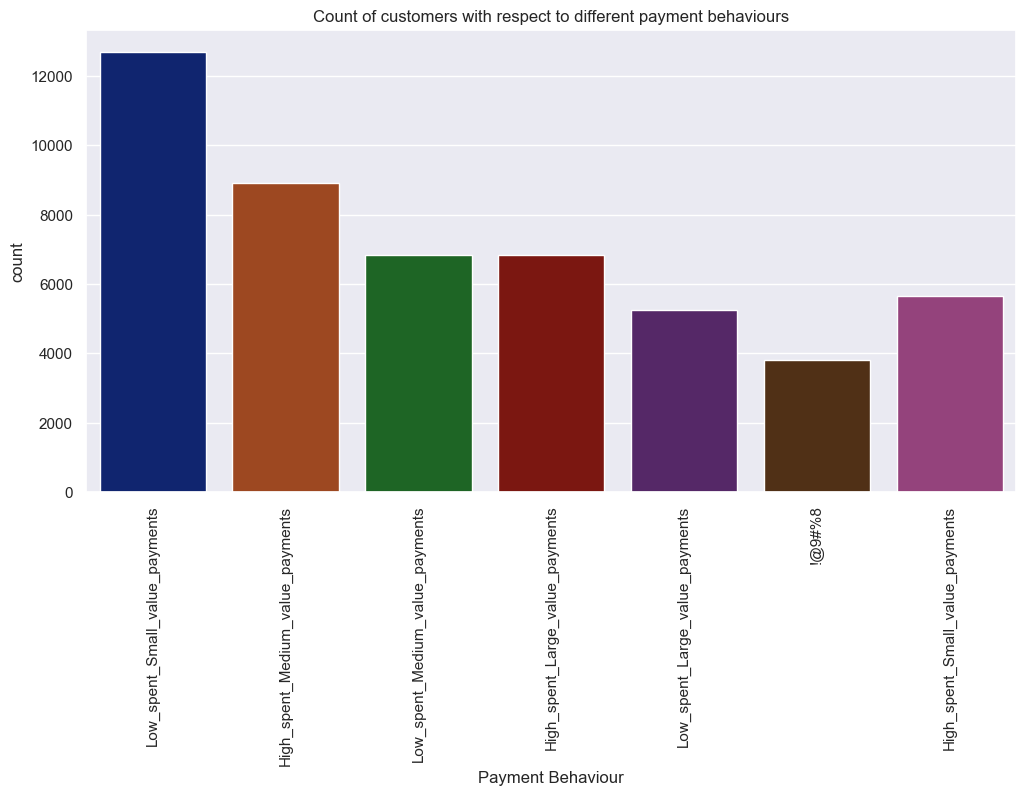

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(data = customer_credit_details , x = 'Payment_Behaviour', palette = 'dark' )
plt.xticks(rotation = 90)
plt.xlabel('Payment Behaviour')
plt.title('Count of customers with respect to different payment behaviours')
plt.show()

### 9.What kind of loan is given to the customers the most?

In [83]:
df['Type_of_Loan'].value_counts().sort_values(ascending = False).reset_index().head()

,Type_of_Loan,count
0,Not Specified,704
1,Credit-Builder Loan,640
2,Personal Loan,636
3,Debt Consolidation Loan,632
4,Student Loan,620


#### Remarks :  Although the loan name thats given to the customers most(704) is 'Not Specified' in the dataset but as we can see 'Credit-Builder Loan' is given 2nd most(640) to the customers  

### 10.How many scientists holds a credit mix as ‘Good’? (use pivot table)

In [201]:
pivot_table = df.pivot_table(index='Occupation', columns='Credit_Mix', aggfunc='size', fill_value=0)
pivot_table

Credit_Mix,Bad,Good,Standard,_
Occupation,,,,
Accountant,609,771,1158,595
Architect,575,783,1248,589
Developer,622,740,1173,611
Doctor,635,704,1123,565
Engineer,674,800,1100,638
Entrepreneur,569,808,1090,636
Journalist,536,737,1179,585
Lawyer,580,828,1253,663
Manager,589,751,1046,614


In [206]:
print('The no of scientists who holds a credit mix as ‘Good’ is : 769' )

The no of scientists who holds a credit mix as ‘Good’ is : 769
